<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> Visión por Computadora 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Laboratorio 4:</strong> Construcción de una U-net</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>José Andrés Auyón Cobar - <strong>201579</strong></li>
      </ul>
    </td>
  </tr>
</table>

## Inciso 1

## Inciso 2 - Imágenes extraídas desde test del dataset BSDS500

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def loadGrayscaleImages(path):
    images = []
    for file in os.listdir(path):
        if file.endswith('.jpg'):
            img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

trainPath = 'data/train'
testPath = 'data/test'

trainImages = loadGrayscaleImages(trainPath)
testImages = loadGrayscaleImages(testPath)

print(f"Train: {len(trainImages)} imágenes")
print(f"Test: {len(testImages)} imágenes")


Train: 22 imágenes
Test: 3 imágenes


## Inciso 3 - Filtro anisotrópico

🟢 Iniciando aplicación del filtro anisotrópico...
→ Procesando imagen 1/22... Tamaño: (321, 481)
→ Procesando imagen 2/22... Tamaño: (321, 481)
→ Procesando imagen 3/22... Tamaño: (481, 321)
→ Procesando imagen 4/22... Tamaño: (321, 481)
→ Procesando imagen 5/22... Tamaño: (321, 481)
→ Procesando imagen 6/22... Tamaño: (321, 481)
→ Procesando imagen 7/22... Tamaño: (321, 481)
→ Procesando imagen 8/22... Tamaño: (321, 481)
→ Procesando imagen 9/22... Tamaño: (321, 481)
→ Procesando imagen 10/22... Tamaño: (321, 481)
→ Procesando imagen 11/22... Tamaño: (321, 481)
→ Procesando imagen 12/22... Tamaño: (321, 481)
→ Procesando imagen 13/22... Tamaño: (481, 321)
→ Procesando imagen 14/22... Tamaño: (321, 481)
→ Procesando imagen 15/22... Tamaño: (481, 321)
→ Procesando imagen 16/22... Tamaño: (321, 481)
→ Procesando imagen 17/22... Tamaño: (321, 481)
→ Procesando imagen 18/22... Tamaño: (321, 481)
→ Procesando imagen 19/22... Tamaño: (321, 481)
→ Procesando imagen 20/22... Tamaño: (321, 481)

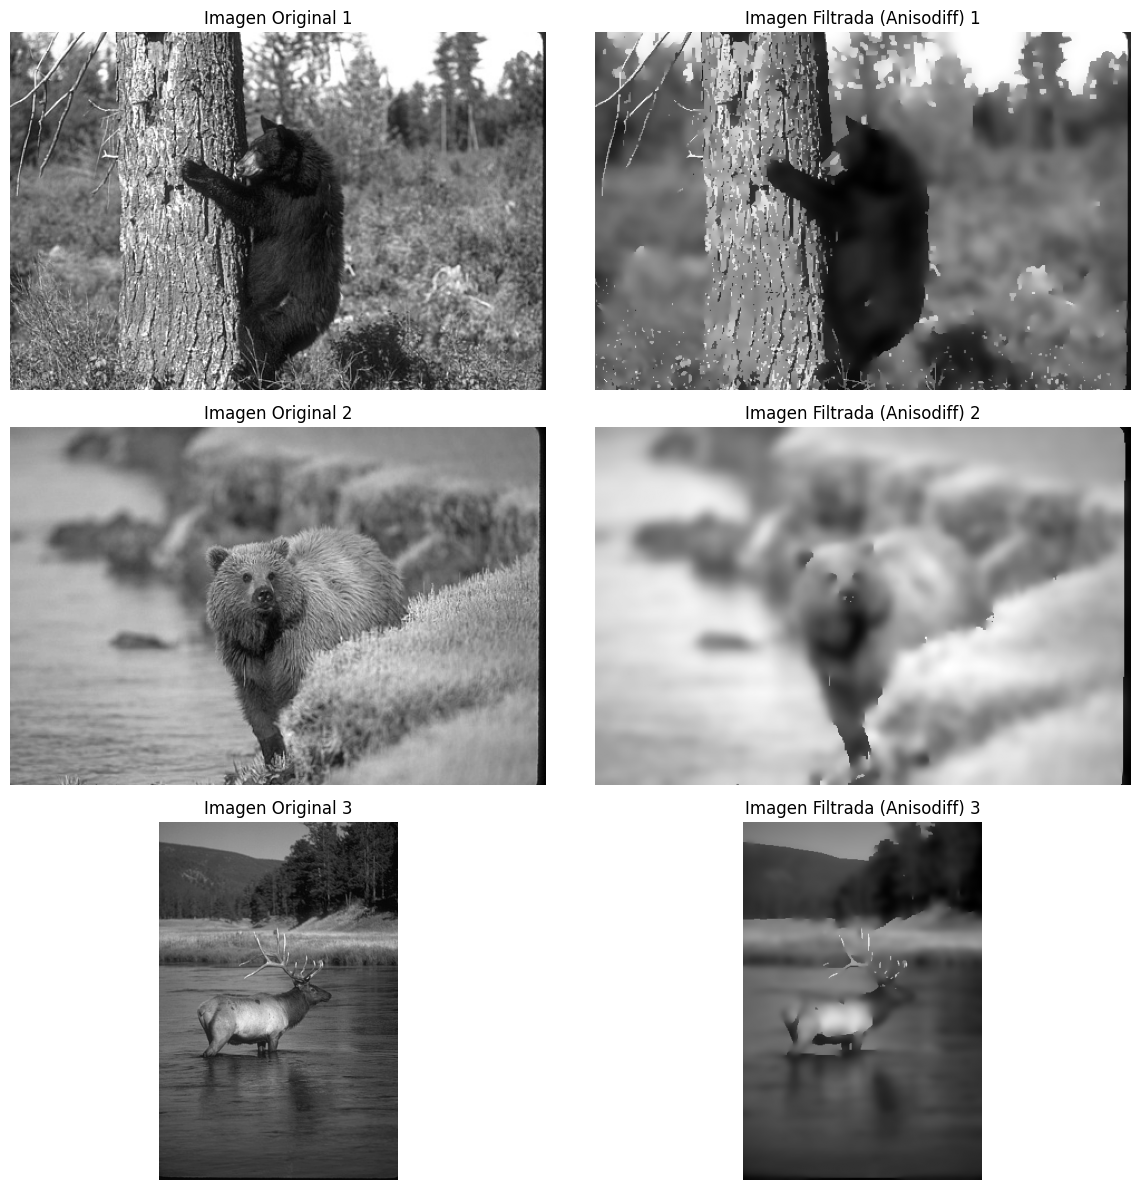

In [9]:
from Anisotropic import anisodiff

# Parámetros del filtro anisotrópico
niter = 50       # Iteraciones de difusión
kappa = 20       # Coeficiente de conducción (sensibilidad a bordes)
gamma = 0.2      # Velocidad de difusión (máx recomendado: 0.25)
step = (1., 1.)  # Tamaño de paso entre píxeles (y, x)
option = 1       # Tipo de ecuación de Perona-Malik (1 o 2)
ploton = False   # Mostrar cada iteración (desactivado)

# Aplicar filtro a cada imagen del set de entrenamiento
filteredTrainImages = []

print("🟢 Iniciando aplicación del filtro anisotrópico...")

for idx, img in enumerate(trainImages):
    print(f"→ Procesando imagen {idx+1}/{len(trainImages)}... Tamaño: {img.shape}")
    
    # Asegurar que la imagen esté en el rango correcto
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)
    
    # Aplicar filtro anisotrópico
    filtered = anisodiff(img, niter=niter, kappa=kappa, gamma=gamma, step=step, option=option, ploton=ploton)
    filteredTrainImages.append(filtered)

print(f"\n✅ Se aplicó el filtro a {len(filteredTrainImages)} imágenes.")

# Visualización
n = 3
plt.figure(figsize=(12, 4 * n))

for i in range(n):
    plt.subplot(n, 2, 2*i + 1)
    plt.imshow(trainImages[i], cmap='gray')
    plt.title(f'Imagen Original {i+1}')
    plt.axis('off')

    plt.subplot(n, 2, 2*i + 2)
    plt.imshow(filteredTrainImages[i], cmap='gray')
    plt.title(f'Imagen Filtrada (Anisodiff) {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()



## Inciso 4

## Inciso 5

## Inciso 6